# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [68]:
import os
os.getcwd()

'/Users/affy/Iron hack Labs Mandatory/lab-ml-and-linear-regression/your-code'

In [69]:
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

--2025-04-03 19:52:47--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2025-04-03 19:52:47 (39.1 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [70]:
import pandas as pd

In [71]:
housing = pd.read_csv('housing.csv')


In [72]:
print('shape: {}'.format(housing.shape))
housing.head()

shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

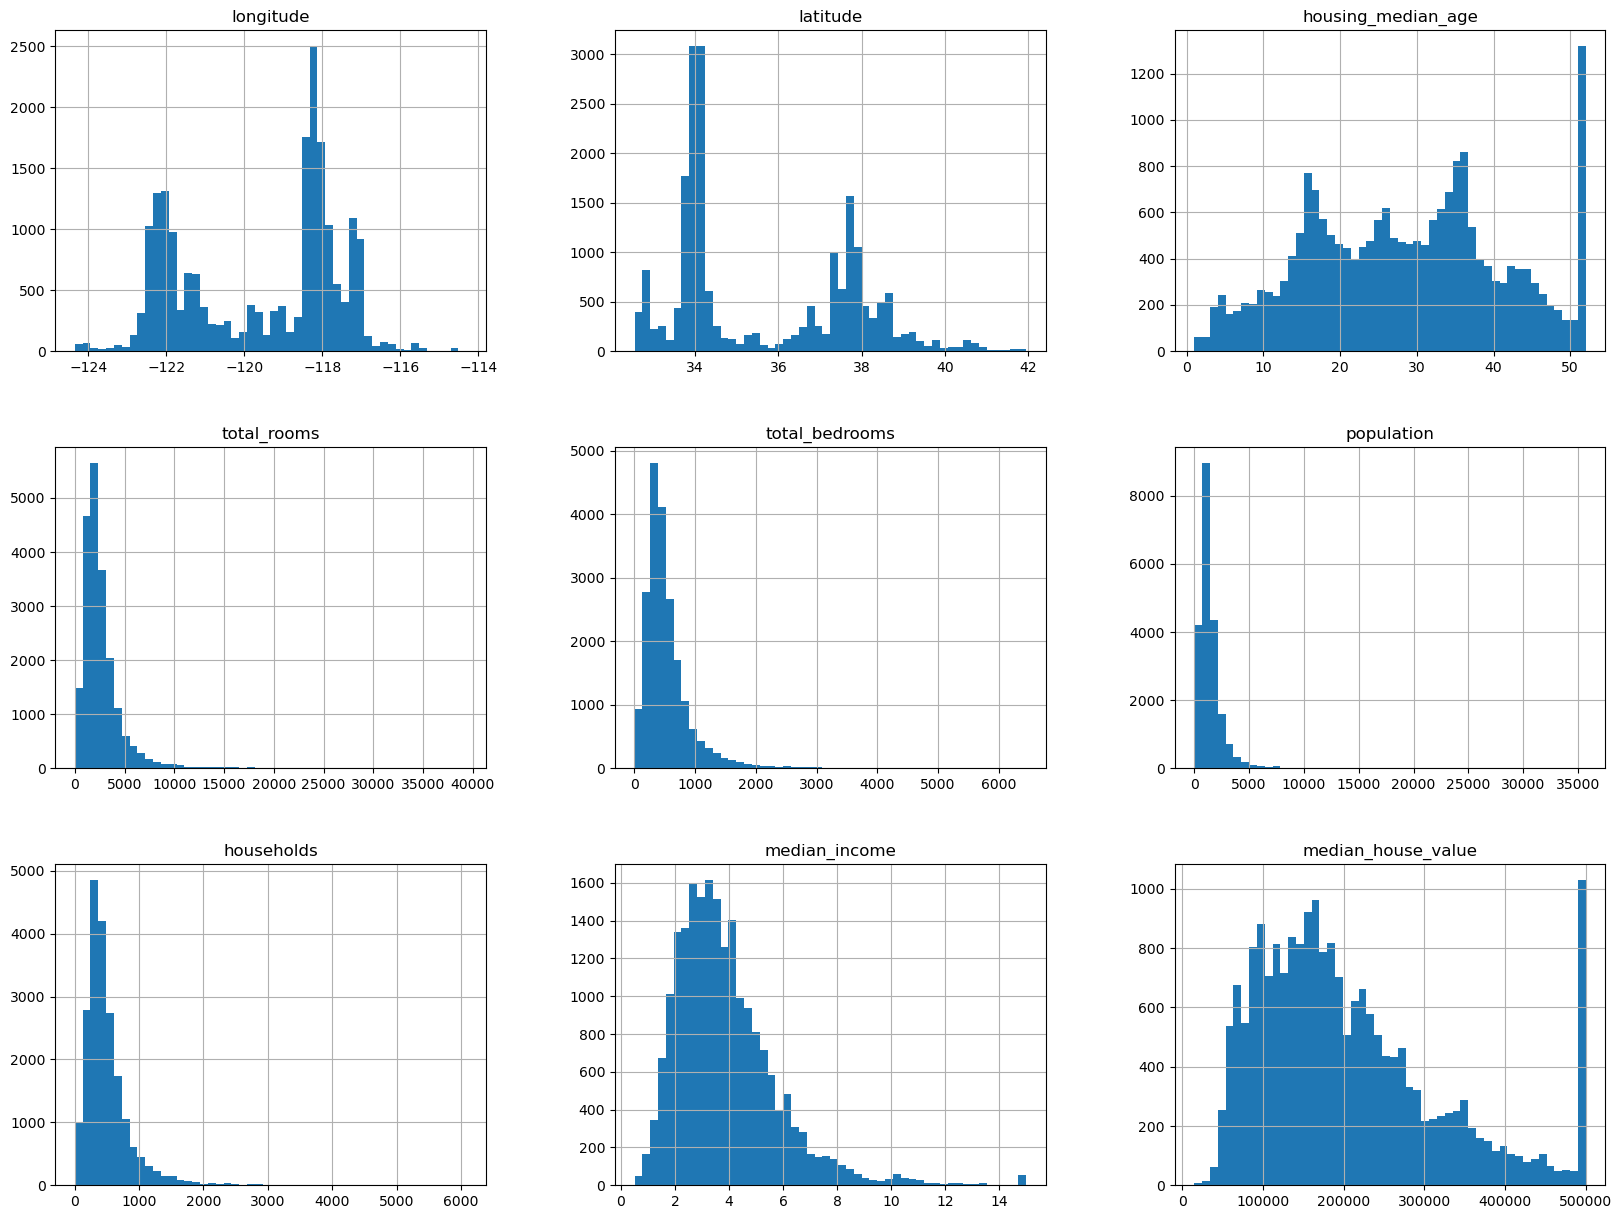

In [73]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [74]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [76]:
median_bedrooms = housing['total_bedrooms'].median()
housing = housing.fillna({'total_bedrooms': median_bedrooms})

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [78]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

In [79]:
housing['population_per_household'] = housing['population'] / housing['households']

In [80]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [81]:
housing["rooms_per_household"].sort_values().head()

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
Name: rooms_per_household, dtype: float64

In [82]:
housing["rooms_per_household"].sort_values(ascending=False).head()

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
Name: rooms_per_household, dtype: float64

In [84]:
housing.drop(index=[1914, 1979, 5916, 8219], inplace=True)

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

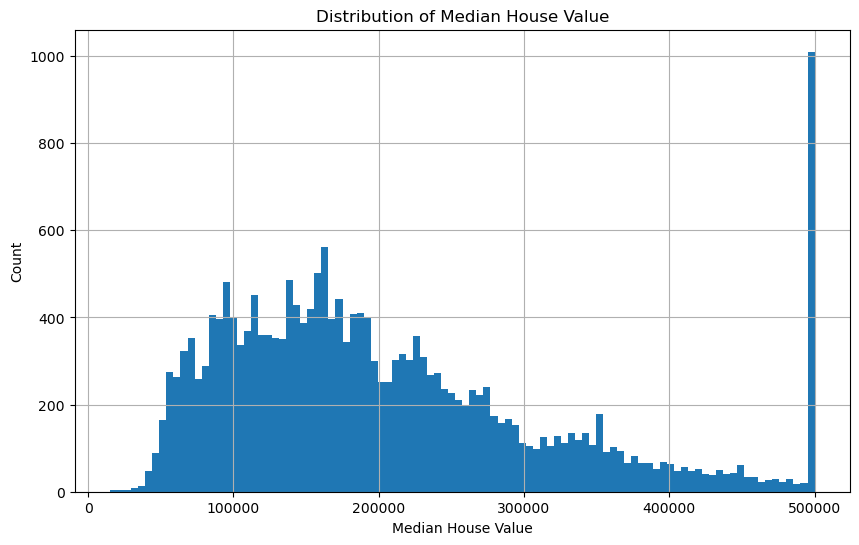

In [95]:
housing["median_house_value"].hist(bins=100, figsize=(10, 6))
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.title("Distribution of Median House Value")
plt.show()

2. Check out what variables correlates the most with "median house value"

In [96]:
correlation_matrix = housing.drop("ocean_proximity", axis=1).corr()

correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688348
rooms_per_household         0.171571
total_rooms                 0.134156
housing_median_age          0.105803
households                  0.065912
total_bedrooms              0.049455
population_per_household   -0.023743
population                 -0.024629
longitude                  -0.045955
latitude                   -0.144384
bedrooms_per_room          -0.233780
Name: median_house_value, dtype: float64

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

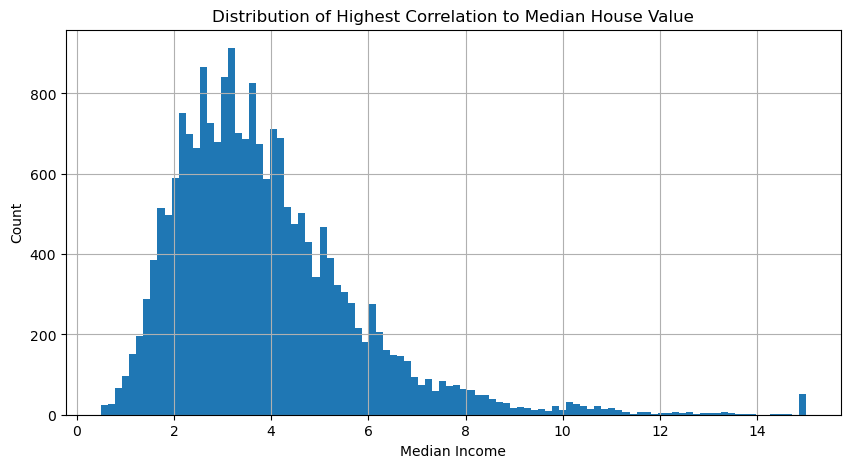

In [97]:
housing["median_income"].hist(bins=100, figsize=(10, 5))
plt.xlabel("Median Income")
plt.ylabel("Count")
plt.title("Distribution of Highest Correlation to Median House Value")
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

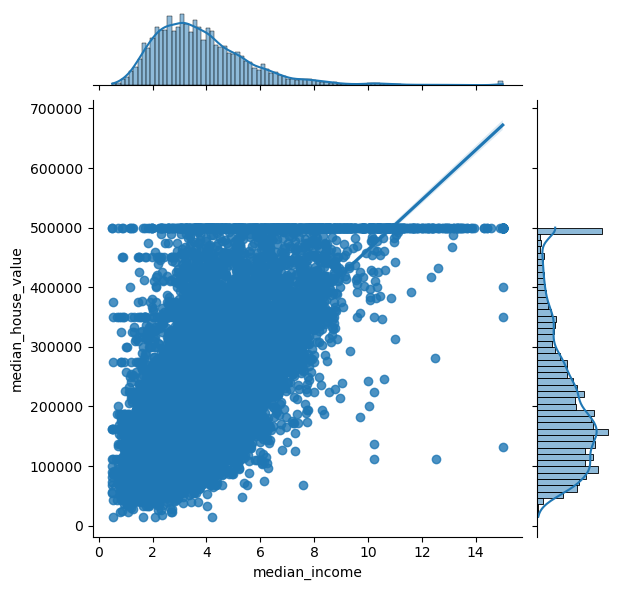

In [98]:
import seaborn as sns

sns.jointplot(
    data=housing,
    x="median_income",
    y="median_house_value",
    kind="reg"
)

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

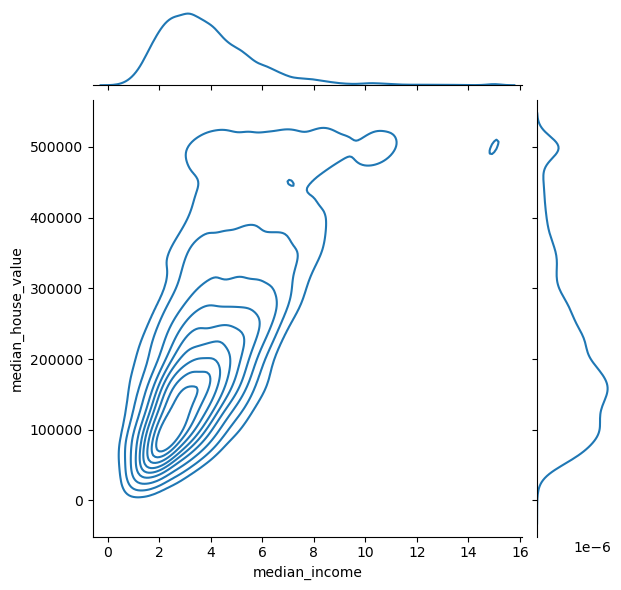

In [99]:
sns.jointplot(
    data=housing,
    x="median_income",
    y="median_house_value",
    kind="kde"
)

The KDE Visualization looks like a heated map with more density

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [100]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=["Low", "Below_Average", "Above_Average", "High", "Very_High"]
)

2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

<Axes: xlabel='income_cat', ylabel='count'>

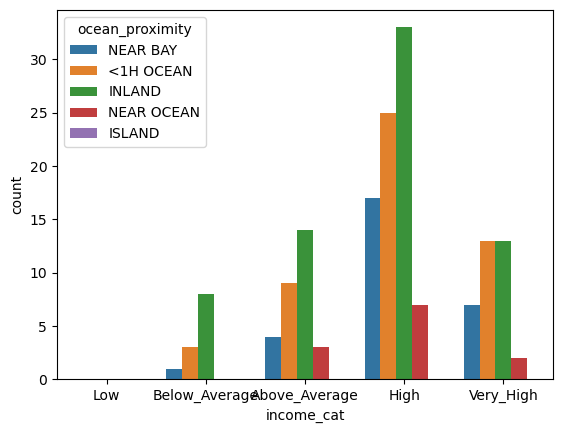

In [101]:
sns.countplot(
    data=housing,
    x="income_cat",
    hue="ocean_proximity"
)

The high and very_high income category appear most in Inland, the Below_Average and Above_Average income category looks more distributed but it is still mostly inland and the low income category are few.

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

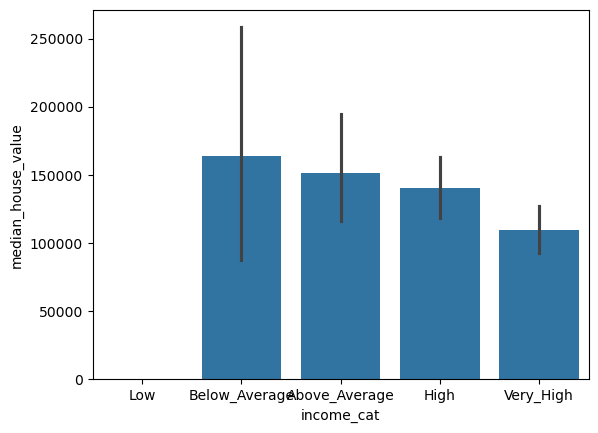

In [102]:
sns.barplot(x="income_cat", y="median_house_value", data=housing)
plt.show()


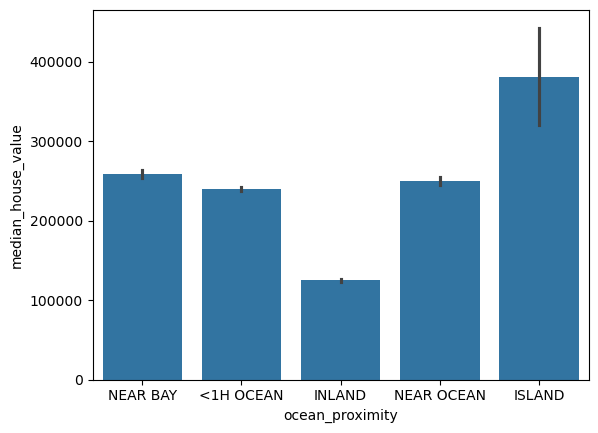

In [103]:
sns.barplot(x="ocean_proximity", y="median_house_value", data=housing)
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [105]:
print(pivot_table.columns.tolist())

['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']


In [108]:
pivot_table = housing.pivot_table(index="income_cat", columns="ocean_proximity", 
                                  values="median_house_value", aggfunc="median")

pivot_table = pivot_table.drop(columns=["ISLAND"], errors="ignore")
pivot_table

/var/folders/2n/gs_200v517s5clp2y1jt0mgc0000gn/T/ipykernel_66668/1087559394.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = housing.pivot_table(index="income_cat", columns="ocean_proximity",


ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Below_Average,162500.0,91250.0,67500.0,NaN
Above_Average,168800.0,87500.0,99700.0,162500.0
High,151600.0,67500.0,137500.0,162500.0
Very_High,121400.0,55700.0,129200.0,75000.0


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

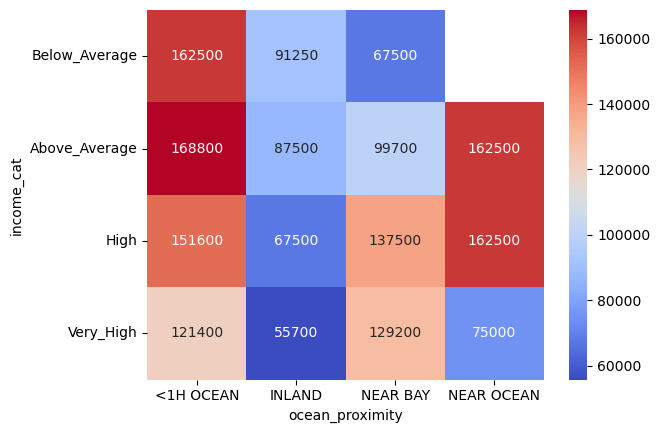

In [110]:
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.show()

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [111]:
housing = housing.drop(columns=["income_cat"])

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [112]:
import scipy.stats as stats

In [113]:
float_columns = housing.select_dtypes(include=['float64']).columns
z_scored = housing[float_columns].apply(stats.zscore)

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [114]:
dummies = pd.get_dummies(housing["ocean_proximity"], drop_first=True)

4. Save our predicting variable to `y`.

In [115]:
y = housing["median_house_value"]

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [116]:
X = pd.concat([z_scored, dummies], axis=1)
X = X.drop(columns=["median_house_value"])  # Drop target

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [120]:
from sklearn.linear_model import LinearRegression


In [121]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

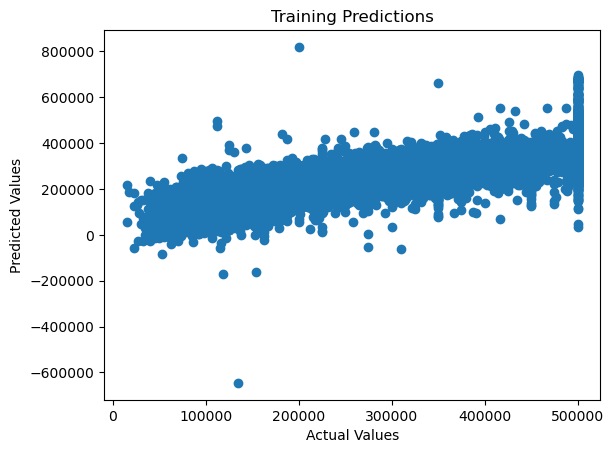

In [125]:
import matplotlib.pyplot as plt

train_predictions = lin_reg.predict(X_train)
plt.scatter(y_train, train_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Predictions")
plt.show()

The x and y axis form like a cloud, a diagonal cloud and the points are clustered on the upside like a sloping line.

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [126]:
from sklearn import metrics

In [127]:
mse = metrics.mean_squared_error(y_train, train_predictions)
r2 = metrics.r2_score(y_train, train_predictions)


In [129]:
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 4639645678.621299
R² Score: 0.6508719376796346


This metric tells me the average square difference between the actual values and the predicted values.

#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [130]:
test_predictions = lin_reg.predict(X_test)

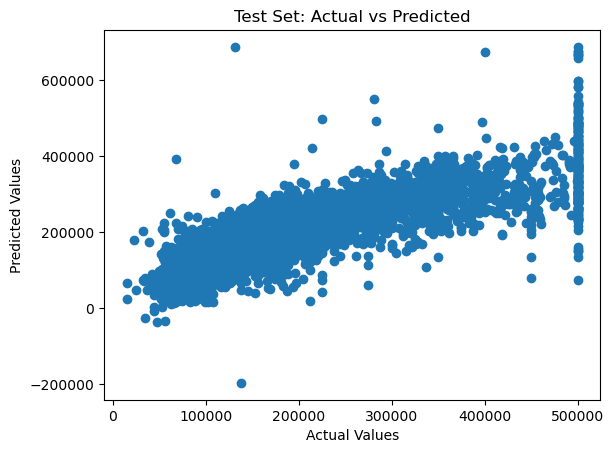

In [131]:
plt.scatter(y_test, test_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs Predicted")
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [132]:
mse_test = metrics.mean_squared_error(y_test, test_predictions)
r2_test = metrics.r2_score(y_test, test_predictions)

In [134]:
print("Mean Squared Error:", mse_test)
print("R² Score:", r2_test)

Mean Squared Error: 4728666426.10032
R² Score: 0.6475371732725931


The MSE increased slightly and the R2 dropped very slightly which means both training and testing scores are very close.

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [137]:
import numpy as np

rmse = np.sqrt(mse_test)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 68765.2995783507


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [4]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.